# Linear Regression Model

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
This code is the implementation of linear regression model for the 
predication of mixerindex for micromixer.

We are using linear regression model which is imported from Sklearn library.

Data is comprised of 60 samples. Each training sample is consist of three input
features(x1,x2,x3) and corresponding output(y) i.e mixingindex.

x1= W (mixer vertical length -mm)
x2= t (channel width - mm)
x3= n (number of mixers)
y= mixingindex

linear model
h=theta0+ theta1*x1+ theta2*x2+ theta3*x3 

these theta's are trained during training.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

1. Importing required packages.
2. Read the data/load the data.
3. Data Cleaning.
4. Visualizing the data, how data looks like.
5. Spliting dataset into training and testing data.
6. Imported Linear regression model is Trained using training data
7. Predication is performed by trained model using testing data
8. Evaluate the Model: Measure the Mean Sqaure Error
9. Prediction for the new sample



# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
%matplotlib inline

#  Read the data/load the data

In [2]:
# we are using pandas libaray for reading the file
# We are reading ecxel file and path should be where you ecxel file is located.
# place "r" before the path string to address special character,such as '\'.
# Don't forget to put the file name at the end of the path + '.xlsx'

data=pd.read_excel(r"C:\python\Fluids Project\Micromixer_Data_for_RectSerpentine.xlsx")


In [3]:
#Showing the first five entries of data
data.head()

,Design number,W (mixer vertical length -mm),t (channel width - mm),n (number of mixers),MixingIndex,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,0.6,0.08,1,0.91447,NaN,NaN,NaN,NaN,Yellows are input parameters
1,2,0.6,0.08,2,0.99443,NaN,NaN,NaN,NaN,Green is output parameter: The most optimized ...
2,3,0.6,0.08,3,0.99961,NaN,NaN,NaN,NaN,NaN
3,4,0.6,0.12,1,0.63460,NaN,NaN,NaN,NaN,NaN
4,5,0.6,0.12,2,0.94813,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
# As there some extra columns so we need to perform data cleaning
# We are droping column  design number,5,6,7,8, and 9

data.drop(columns='Design number', inplace=True)
data.head()

,W (mixer vertical length -mm),t (channel width - mm),n (number of mixers),MixingIndex,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0.6,0.08,1,0.91447,NaN,NaN,NaN,NaN,Yellows are input parameters
1,0.6,0.08,2,0.99443,NaN,NaN,NaN,NaN,Green is output parameter: The most optimized ...
2,0.6,0.08,3,0.99961,NaN,NaN,NaN,NaN,NaN
3,0.6,0.12,1,0.63460,NaN,NaN,NaN,NaN,NaN
4,0.6,0.12,2,0.94813,NaN,NaN,NaN,NaN,NaN


In [5]:
data.drop(columns='Unnamed: 5', inplace=True)
data.drop(columns='Unnamed: 6', inplace=True)
data.drop(columns='Unnamed: 7', inplace=True)
data.drop(columns='Unnamed: 8', inplace=True)
data.drop(columns='Unnamed: 9', inplace=True)
data.head()

,W (mixer vertical length -mm),t (channel width - mm),n (number of mixers),MixingIndex
0,0.6,0.08,1,0.91447
1,0.6,0.08,2,0.99443
2,0.6,0.08,3,0.99961
3,0.6,0.12,1,0.63460
4,0.6,0.12,2,0.94813


# Visualizing the data, how data looks like.

In [6]:
# Information about your data, how many entries and which type of data is present in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   W (mixer vertical length -mm)  60 non-null     float64
 1   t (channel width - mm)         60 non-null     float64
 2   n (number of mixers)           60 non-null     int64  
 3   MixingIndex                    60 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [7]:
#tells the shape of dataframe
data.shape

(60, 4)

<AxesSubplot:xlabel='W (mixer vertical length -mm)', ylabel='MixingIndex'>

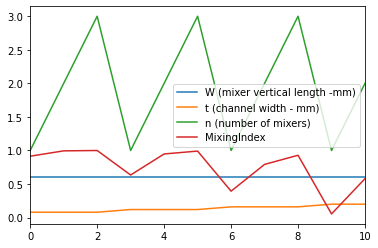

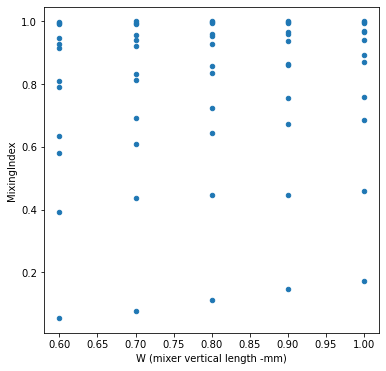

In [8]:
data.plot(xlim=(0,10))

data.plot(kind='scatter', x='W (mixer vertical length -mm)', y='MixingIndex', figsize=(6,6))

<AxesSubplot:xlabel='t (channel width - mm)', ylabel='MixingIndex'>

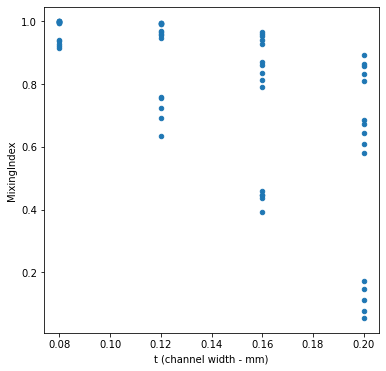

In [9]:
data.plot(kind='scatter', x='t (channel width - mm)', y='MixingIndex', figsize=(6,6))

<AxesSubplot:xlabel='t (channel width - mm)', ylabel='n (number of mixers)'>

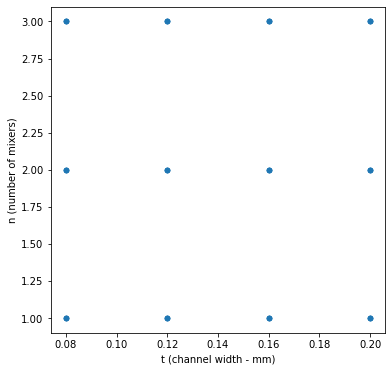

In [10]:
data.plot(kind='scatter', x='t (channel width - mm)', y='n (number of mixers)', figsize=(6,6))

<AxesSubplot:xlabel='n (number of mixers)', ylabel='MixingIndex'>

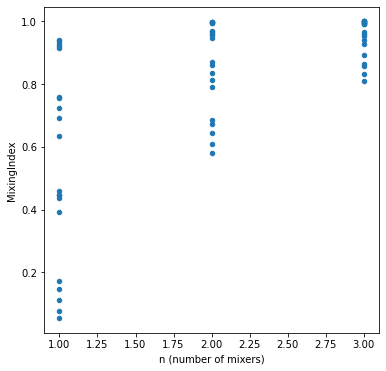

In [11]:
data.plot(kind='scatter', x='n (number of mixers)', y='MixingIndex', figsize=(6,6))

# Spliting dataset into training and testing data

Total of 60 samples we are taking first 40 samples as training data and last 20 samples as testing data

In [12]:
#Training data
training_data=data.iloc[:40, 0:3]
training_data.head()

,W (mixer vertical length -mm),t (channel width - mm),n (number of mixers)
0,0.6,0.08,1
1,0.6,0.08,2
2,0.6,0.08,3
3,0.6,0.12,1
4,0.6,0.12,2


In [13]:
training_data.shape

(40, 3)

In [14]:
training_data.describe()

,W (mixer vertical length -mm),t (channel width - mm),n (number of mixers)
count,40.000000,40.00000,40.000000
mean,0.720000,0.13500,1.975000
std,0.099228,0.04591,0.831665
min,0.600000,0.08000,1.000000
25%,0.600000,0.08000,1.000000
50%,0.700000,0.12000,2.000000
75%,0.800000,0.16000,3.000000
max,0.900000,0.20000,3.000000


In [15]:
training_label=data.iloc[:40, -1]
training_label.head()

0    0.91447
1    0.99443
2    0.99961
3    0.63460
4    0.94813
Name: MixingIndex, dtype: float64

In [16]:
print('shape:', training_label.shape)
print('type:', training_label.dtype)

shape: (40,)
type: float64


In [17]:
#testing data

testing_data=data.iloc[41:, 0:3]
testing_data.head()

,W (mixer vertical length -mm),t (channel width - mm),n (number of mixers)
41,0.9,0.12,3
42,0.9,0.16,1
43,0.9,0.16,2
44,0.9,0.16,3
45,0.9,0.20,1


In [18]:
testing_label=data.iloc[41:, -1]
testing_label.head()

41    0.99519
42    0.44521
43    0.86065
44    0.96091
45    0.14609
Name: MixingIndex, dtype: float64

# Imported Linear regression model is Trained using training data

In [19]:
# linear regression model from sklearn is used
# normalization is performed
model = linear_model.LinearRegression(normalize=True)

#model is trained using our data
model.fit(training_data,training_label)

LinearRegression(normalize=True)

# Predication is performed by trained model using testing data

In [20]:
# Now prediction is formed using trained model
y_predicted = model.predict(testing_data)

Feature: 0, Score: 0.12677
Feature: 1, Score: -3.76483
Feature: 2, Score: 0.19043


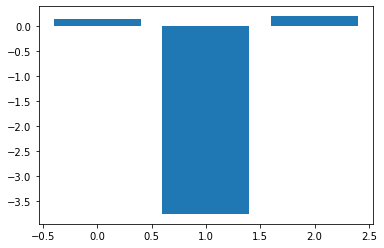

In [21]:
# Checking the importance of features
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Evaluate the Model: Measure the Mean Sqaure Error

In [22]:
# Model is evaluated by measuring Mean squared error
print("Mean squared error is: ", mean_squared_error(testing_label, y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

Mean squared error is:  0.015285741290309757
Weights:  [ 0.12676605 -3.7648329   0.19042849]
Intercept:  0.8271818341589408


In [23]:
X=testing_data['n (number of mixers)']
X.head()

41    3
42    1
43    2
44    3
45    1
Name: n (number of mixers), dtype: int64

#  Prediction for the new sample

In [24]:
#Just for checking I have taken testing sample

In [25]:
print('input features')
testing_data.iloc[3]

input features


W (mixer vertical length -mm)    0.90
t (channel width - mm)           0.16
n (number of mixers)             3.00
Name: 44, dtype: float64

In [26]:
print('Mixingidex')
testing_label.iloc[3]

Mixingidex


0.96091

In [27]:
# Here you can enter new input in array below

In [28]:
test_sample= np.array([0.9,0.16,3])
test_sample

array([0.9 , 0.16, 3.  ])

In [29]:
test_sample.shape

(3,)

In [30]:
type(test_sample)

numpy.ndarray

In [31]:
test_sample.ndim

1

In [32]:
test_sample=test_sample.reshape(1,3)
print(test_sample.shape)
print(test_sample.ndim)

(1, 3)
2


In [33]:
y_predicted = model.predict(test_sample)

In [34]:
y_predicted

array([0.9101835])